In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve
from sklearn.model_selection import cross_val_score

This dataset is a cumulative record of all observed Kepler "objects of interest" — basically, all of the approximately 10,000 exoplanet candidates Kepler has taken observations on.

This dataset has an extensive data dictionary, which can be accessed here. Highlightable columns of note are:

KOI - Kepler Object of Interest.

kepoi_name: A KOI is a target identified by the Kepler Project that displays at least one transit-like sequence within Kepler time-series photometry that appears to be of astrophysical origin and initially consistent with a planetary transit hypothesis.

kepler_name: These names are intended to clearly indicate a class of objects that have been confirmed or validated as planets—a step up from the planet candidate designation.

koi_disposition: The disposition in the literature towards this exoplanet candidate. One of CANDIDATE, FALSE POSITIVE, NOT DISPOSITIONED or CONFIRMED.

koi_pdisposition: The disposition Kepler data analysis has towards this exoplanet candidate. One of FALSE POSITIVE, NOT DISPOSITIONED, and CANDIDATE.

koi_score: A value between 0 and 1 that indicates the confidence in the KOI disposition. For CANDIDATEs, a higher value indicates more confidence in its disposition, while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition.

koi_fpflag_nt: A KOI whose light curve is not consistent with that of a transiting planet. This includes, but is not limited to, instrumental artifacts, non-eclipsing variable stars, and spurious (very low SNR) detections.

koi_fpflag_ss: A KOI that is observed to have a significant secondary event, transit shape, or out-of-eclipse variability, which indicates that the transit-like event is most likely caused by an eclipsing binary. However, self-luminous, hot Jupiters with a visible secondary eclipse will also have this flag set, but with a disposition of PC.

koi_fpflag_co: The source of the signal is from a nearby star, as inferred by measuring the centroid location of the image both in and out of transit, or by the strength of the transit signal in the target's outer (halo) pixels as compared to the transit signal from the pixels in the optimal (or core) aperture.

koi_srad: The photospheric radius of the star.

koi_kepmag: This is the Kepler band.

koi_period: The interval between consecutive planetary transits.


# Loading and preprocessing the data

In [41]:
df = pd.read_csv('/home/administrator/Documents/PROGRAMMING/ML/Datasets/cumulative.csv')
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [42]:
df.tail(10)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
9554,9555,8308347,K03761.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,1,0,0,...,-174.0,4.603,0.066,-0.048,0.664,0.070,-0.064,294.89749,44.215790,15.473
9555,9556,2697935,K03853.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-141.0,3.508,0.187,-0.153,3.318,0.665,-0.813,287.46786,37.966640,10.630
9556,9557,8258160,K03870.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-185.0,4.477,0.099,-0.121,0.857,0.138,-0.101,299.21881,44.181862,16.375
9557,9558,11911561,K03875.01,NaN,CANDIDATE,CANDIDATE,1.000,0,0,0,...,-181.0,4.027,0.434,-0.186,1.514,0.426,-0.640,290.14914,50.239178,13.579
9558,9559,8765560,K03891.01,NaN,CANDIDATE,CANDIDATE,1.000,0,0,0,...,-159.0,3.597,0.968,-0.242,2.780,1.089,-2.022,296.15601,44.920090,13.731
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9563,9564,10156110,K07989.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,1,...,-225.0,4.385,0.054,-0.216,1.193,0.410,-0.137,297.00977,47.121021,14.826


In [43]:
df.shape

(9564, 50)

In [44]:
df['koi_pdisposition'].value_counts()

koi_pdisposition
FALSE POSITIVE    5068
CANDIDATE         4496
Name: count, dtype: int64

<Axes: xlabel='koi_pdisposition', ylabel='count'>

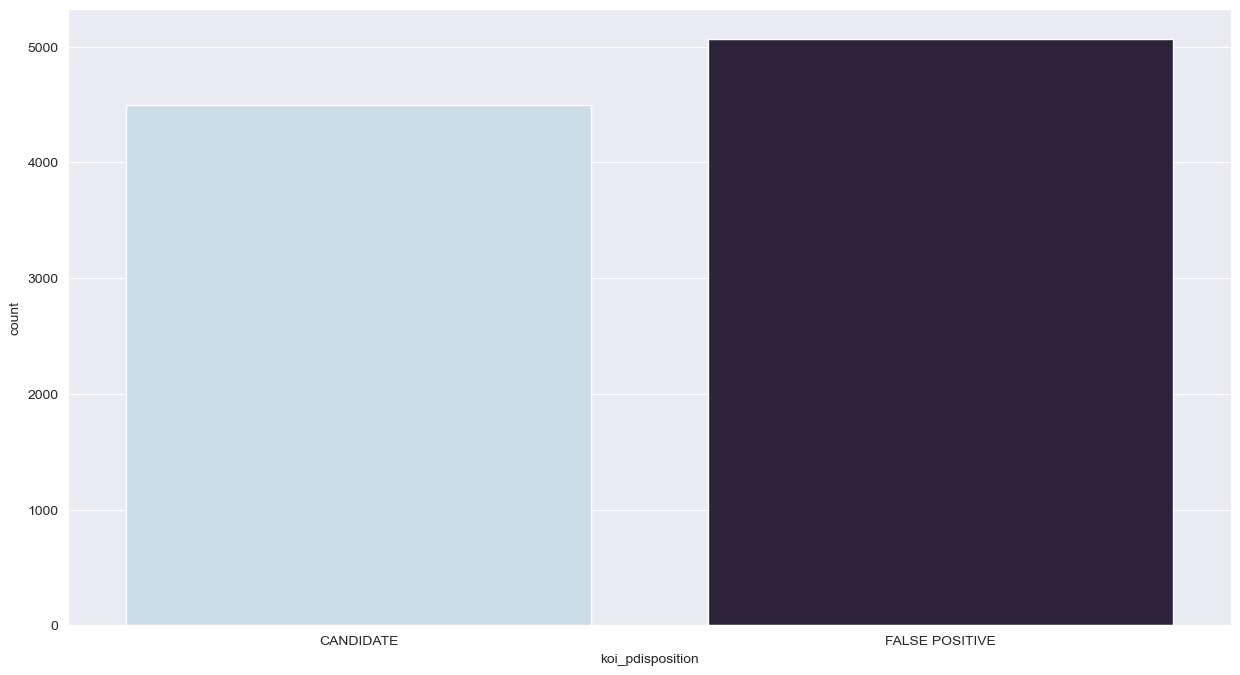

In [45]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.countplot(x = df['koi_pdisposition'], palette = 'ch:s=.25,rot=-.25')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

# Label Encoding the categorical target variable

In [47]:
le = LabelEncoder()
df['koi_pdisposition'] = le.fit_transform(df['koi_pdisposition'])
df['koi_disposition'] = le.fit_transform(df['koi_disposition'])

In [48]:
df.describe()

,rowid,kepid,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9564.000000,9.564000e+03,9564.000000,9564.000000,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,4782.500000,7.690628e+06,1.290151,0.529904,0.480829,0.188206,0.231598,0.194898,0.120033,75.671358,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2761.033321,2.653459e+06,0.822271,0.499131,0.476928,0.390897,0.421875,0.396143,0.325018,1334.744046,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,2391.750000,5.556034e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,4782.500000,7.906892e+06,2.000000,1.000000,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,7173.250000,9.873066e+06,2.000000,1.000000,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,9564.000000,1.293514e+07,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,129995.778400,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


# Handling Missing Values

In [49]:
df.isnull().sum()

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff   

In [50]:
df = df.drop(columns=['rowid', 'kepid', 'kepler_name', 'koi_teq_err1', 'koi_teq_err2', 'kepler_name', 'kepoi_name', 'koi_teq_err1', 'koi_teq_err2', 'koi_tce_delivname'], axis = 1)

In [51]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_attributes = df[numerical_columns]

In [52]:
numerical_attributes

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,0,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,1,0,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,2,1,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,2,1,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,1,0,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,2,1,0.000,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,2,1,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,0,0,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,2,1,0.021,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [53]:
df.isnull().mean()

koi_disposition      0.000000
koi_pdisposition     0.000000
koi_score            0.157884
koi_fpflag_nt        0.000000
koi_fpflag_ss        0.000000
koi_fpflag_co        0.000000
koi_fpflag_ec        0.000000
koi_period           0.000000
koi_period_err1      0.047470
koi_period_err2      0.047470
koi_time0bk          0.000000
koi_time0bk_err1     0.047470
koi_time0bk_err2     0.047470
koi_impact           0.037955
koi_impact_err1      0.047470
koi_impact_err2      0.047470
koi_duration         0.000000
koi_duration_err1    0.047470
koi_duration_err2    0.047470
koi_depth            0.037955
koi_depth_err1       0.047470
koi_depth_err2       0.047470
koi_prad             0.037955
koi_prad_err1        0.037955
koi_prad_err2        0.037955
koi_teq              0.037955
koi_insol            0.033563
koi_insol_err1       0.033563
koi_insol_err2       0.033563
koi_model_snr        0.037955
koi_tce_plnt_num     0.036177
koi_steff            0.037955
koi_steff_err1       0.048934
koi_steff_

In [54]:
df = df.fillna(df.mean())

In [55]:
df.isnull().sum()

koi_disposition      0
koi_pdisposition     0
koi_score            0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                   0
dec                  0
koi_kepmag           0
dtype: int6

# Correlation heatmap

<Axes: >

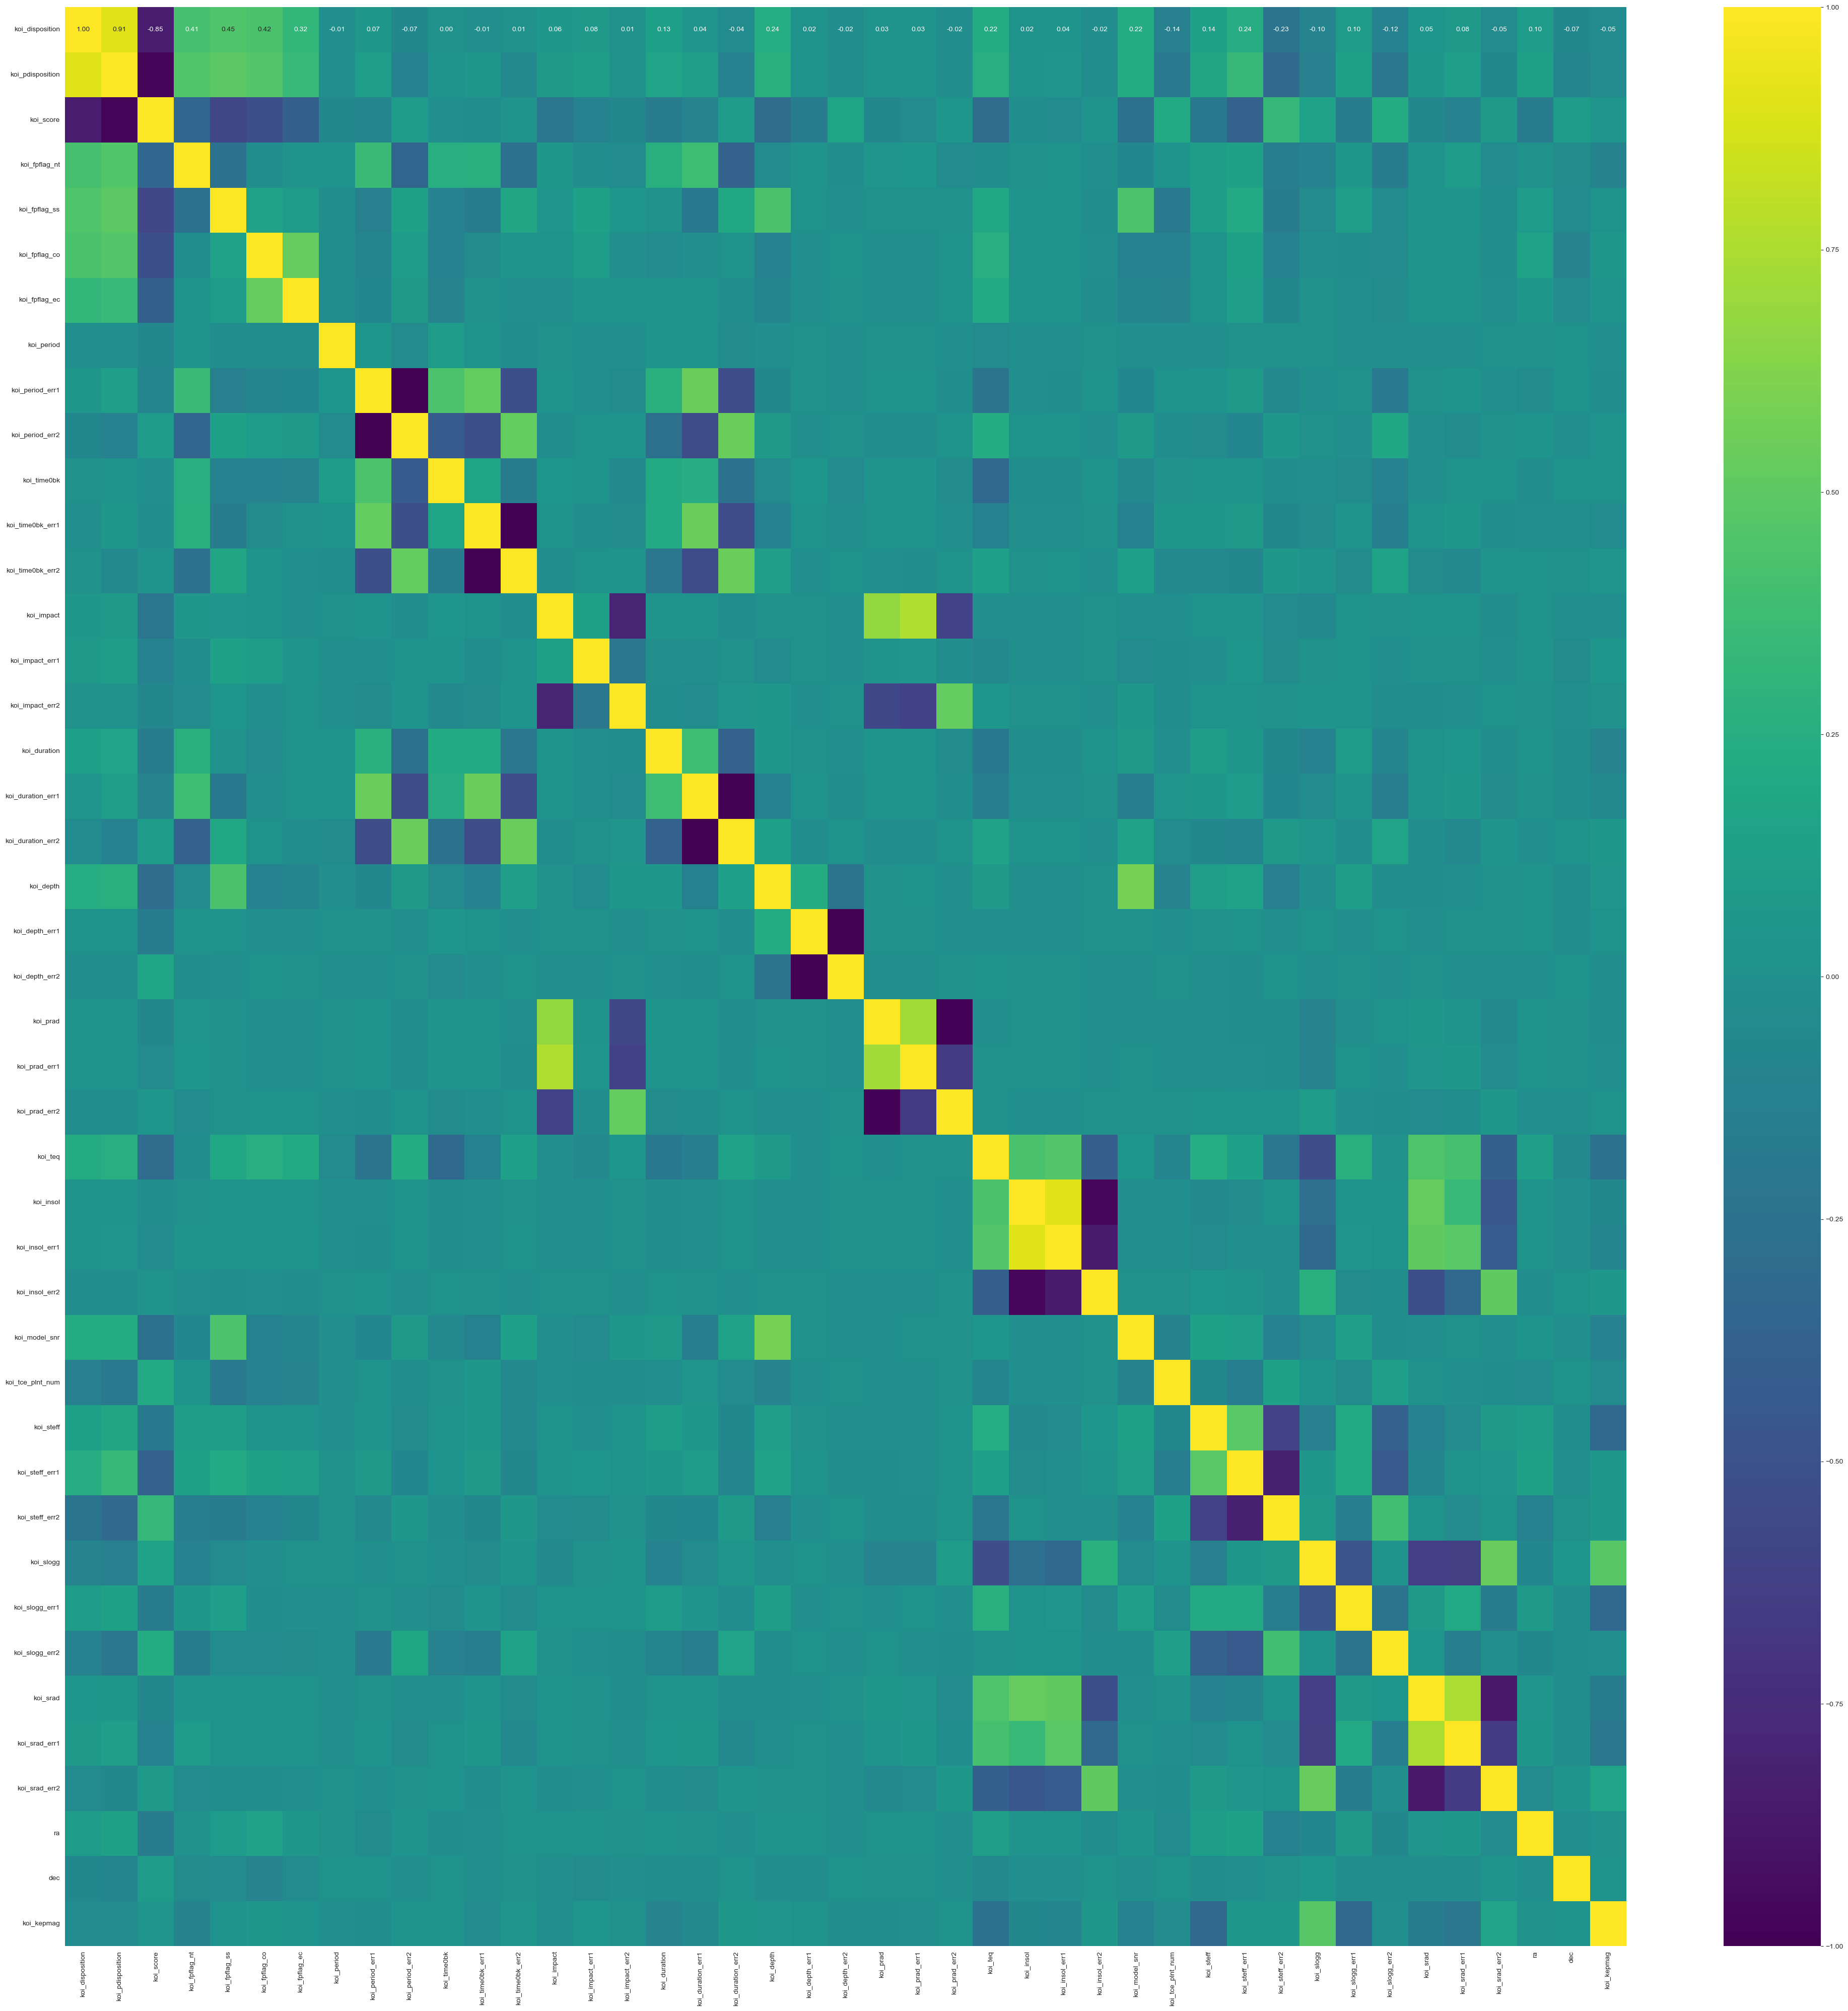

In [56]:
plt.figure(figsize=(50, 50))
sns.heatmap(numerical_attributes.corr(), annot=True, cmap='viridis', fmt='.2f')

# Outliers detection

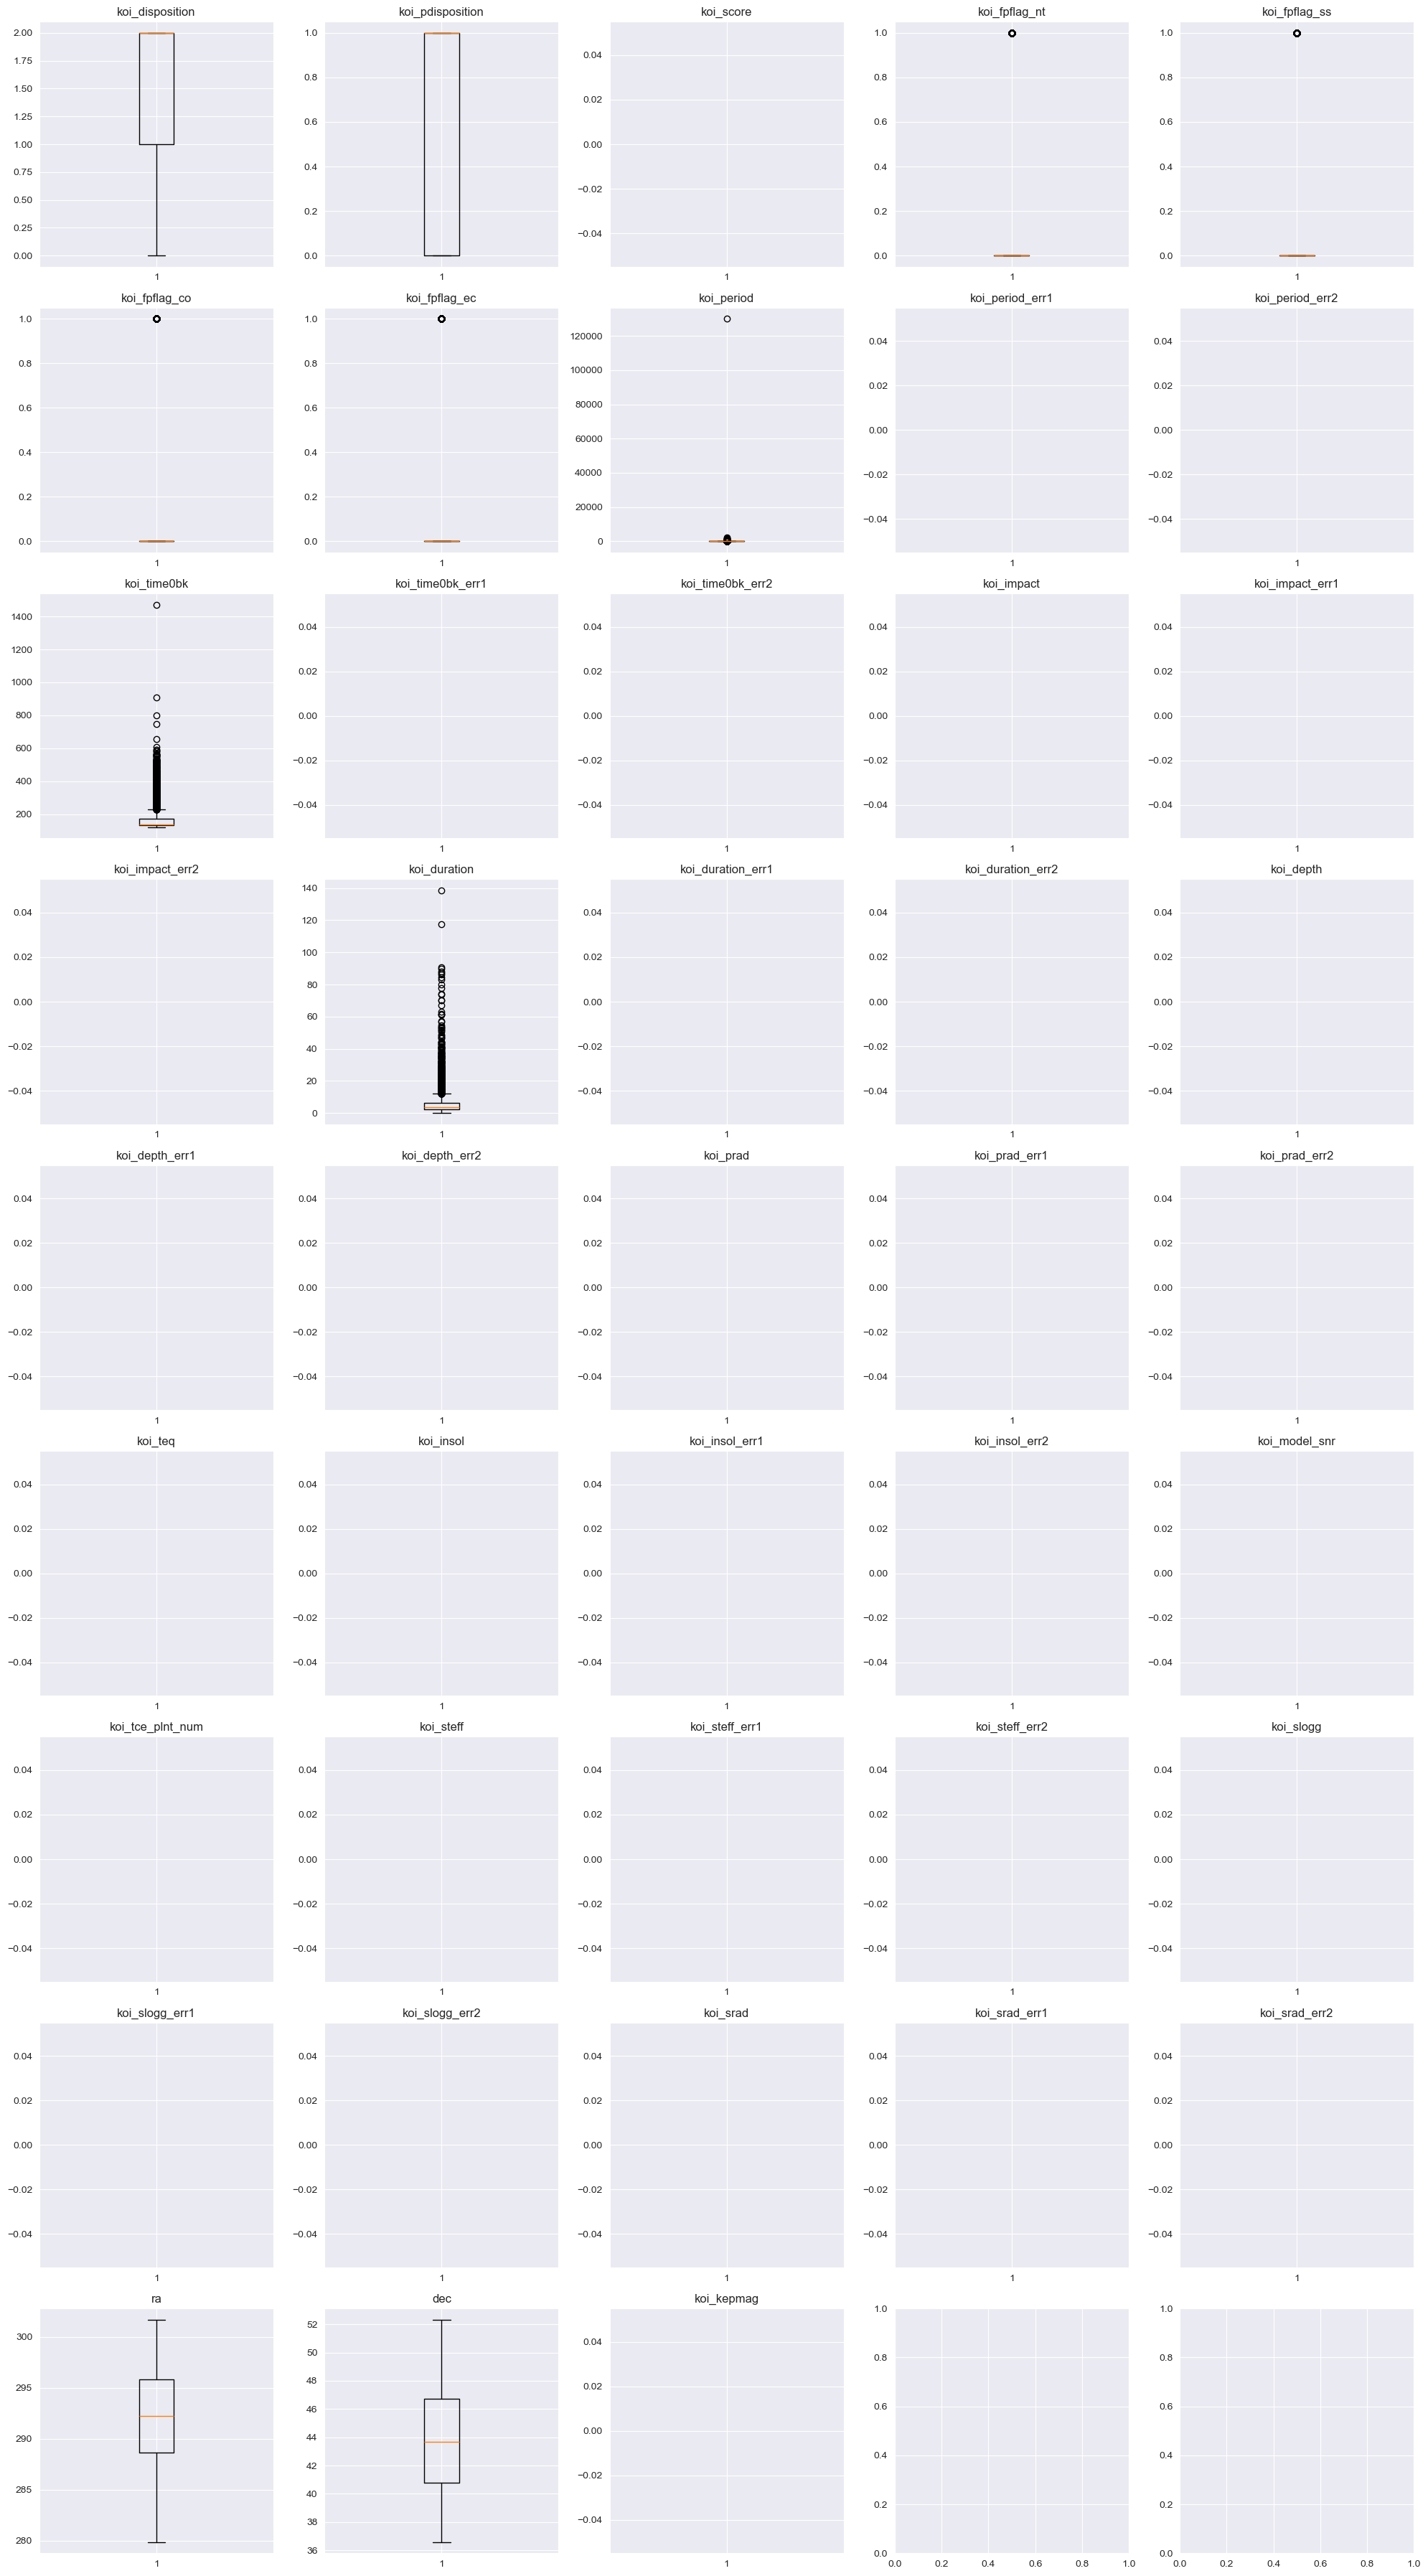

In [57]:
num_attributes = len(numerical_attributes.columns)
num_cols = 5
num_rows = -(-num_attributes // num_cols)

fig_width = 4 * num_cols
fig_height = 4 * num_rows

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(fig_width, fig_height))

axes = axes.flatten()

for i, col in enumerate(numerical_attributes.columns):
    axes[i].boxplot(numerical_attributes[col])
    axes[i].set_title(col)

plt.tight_layout()

plt.show()

In [58]:
X = df.drop(columns=['koi_pdisposition', 'koi_disposition'], axis=1)
Y = df['koi_pdisposition']

# Splitting the dataset into training and testing in the ratio of 70:30

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42) 

# Standardizing the data

In [60]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Machine-learning Models

In [61]:
classifiers = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(),
              ExtraTreeClassifier(),HistGradientBoostingClassifier(),XGBRFClassifier(n_estimators=500, max_depth=12, eta=0.1, subsample=0.7, colsample_bytree=0.8),CatBoostClassifier(),AdaBoostClassifier(),XGBClassifier(),LGBMClassifier(),KNeighborsClassifier(n_neighbors=5)]
names = ['Logistic_Regression', 'Decision_Tree', 'Random_Forest','Gaussian_NB','Extra_Tree', 'Hist_Gradient_Boosting','XGboostRF','catboost','adaboost','xgboost','Lightgbm','KNN']

In [62]:
model_dict = {}
for name, reg in zip(names, classifiers):
    
    # training
    reg.fit(X_train, Y_train)
    
    # accuracy
    score = reg.score(X_test, Y_test)
    model_dict[name] = [accuracy_score(Y_train, reg.predict(X_train)),accuracy_score(Y_test, reg.predict(X_test)) ]

Learning rate set to 0.023201
0:	learn: 0.6282334	total: 8.07ms	remaining: 8.06s
1:	learn: 0.5715029	total: 17.3ms	remaining: 8.65s
2:	learn: 0.5198623	total: 29.1ms	remaining: 9.67s
3:	learn: 0.4767082	total: 221ms	remaining: 54.9s
4:	learn: 0.4350283	total: 230ms	remaining: 45.7s
5:	learn: 0.3964562	total: 240ms	remaining: 39.8s
6:	learn: 0.3592275	total: 248ms	remaining: 35.2s
7:	learn: 0.3302886	total: 257ms	remaining: 31.8s
8:	learn: 0.3043895	total: 269ms	remaining: 29.6s
9:	learn: 0.2748511	total: 287ms	remaining: 28.4s
10:	learn: 0.2496275	total: 295ms	remaining: 26.5s
11:	learn: 0.2271320	total: 306ms	remaining: 25.2s
12:	learn: 0.2091709	total: 313ms	remaining: 23.8s
13:	learn: 0.1916358	total: 322ms	remaining: 22.7s
14:	learn: 0.1789017	total: 322ms	remaining: 22.7s
15:	learn: 0.1688159	total: 510ms	remaining: 33.4s
16:	learn: 0.1557055	total: 520ms	remaining: 31.9s
17:	learn: 0.1468274	total: 532ms	remaining: 30.7s
18:	learn: 0.1396365	total: 544ms	remaining: 29.6s
19:	lear

In [63]:
model_df = pd.DataFrame(model_dict, index = ["Training Accuracy","Testing Accuracy"]).T
model_df= model_df.sort_values(by=["Training Accuracy","Testing Accuracy"], ascending=False)
model_df

,Training Accuracy,Testing Accuracy
xgboost,1.000000,0.990941
Hist_Gradient_Boosting,1.000000,0.989547
Lightgbm,1.000000,0.989547
Random_Forest,1.000000,0.989199
Decision_Tree,1.000000,0.986063
Extra_Tree,1.000000,0.983624
catboost,0.999851,0.990592
XGboostRF,0.997610,0.990941
adaboost,0.996863,0.988850
Logistic_Regression,0.987003,0.983275


# Confusion Matrix of all the Models

In [64]:
def conf_matrix(classifiers, names, X_test, Y_test):
    num_classifiers = len(classifiers)
    num_cols = 3  # Number of plots per row
    num_rows = -(-num_classifiers // num_cols)  # Ceiling division to calculate number of rows
    
    fig_width = 15
    fig_height = 5 * num_rows
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(fig_width, fig_height))
    
    for i, (name, clf) in enumerate(zip(names, classifiers)):
        row_index = i // num_cols
        col_index = i % num_cols
        
        # Predictions
        y_pred = clf.predict(X_test)
        
        # Confusion matrix
        cm = confusion_matrix(Y_test, y_pred)
        
        # Plot heatmap
        ax = axes[row_index, col_index]
        sns.heatmap(cm, annot=True, fmt='d', ax=ax)
        ax.set_title(name + ' Confusion Matrix')
        ax.set_xlabel('Predicted Labels')
        ax.set_ylabel('True Labels')
        ax.set_xticklabels(range(len(np.unique(Y_test))))
        ax.set_yticklabels(range(len(np.unique(Y_test))))
    
    # Hide empty subplots
    for i in range(num_classifiers, num_rows * num_cols):
        row_index = i // num_cols
        col_index = i % num_cols
        fig.delaxes(axes[row_index, col_index])
    
    plt.tight_layout()
    plt.show()

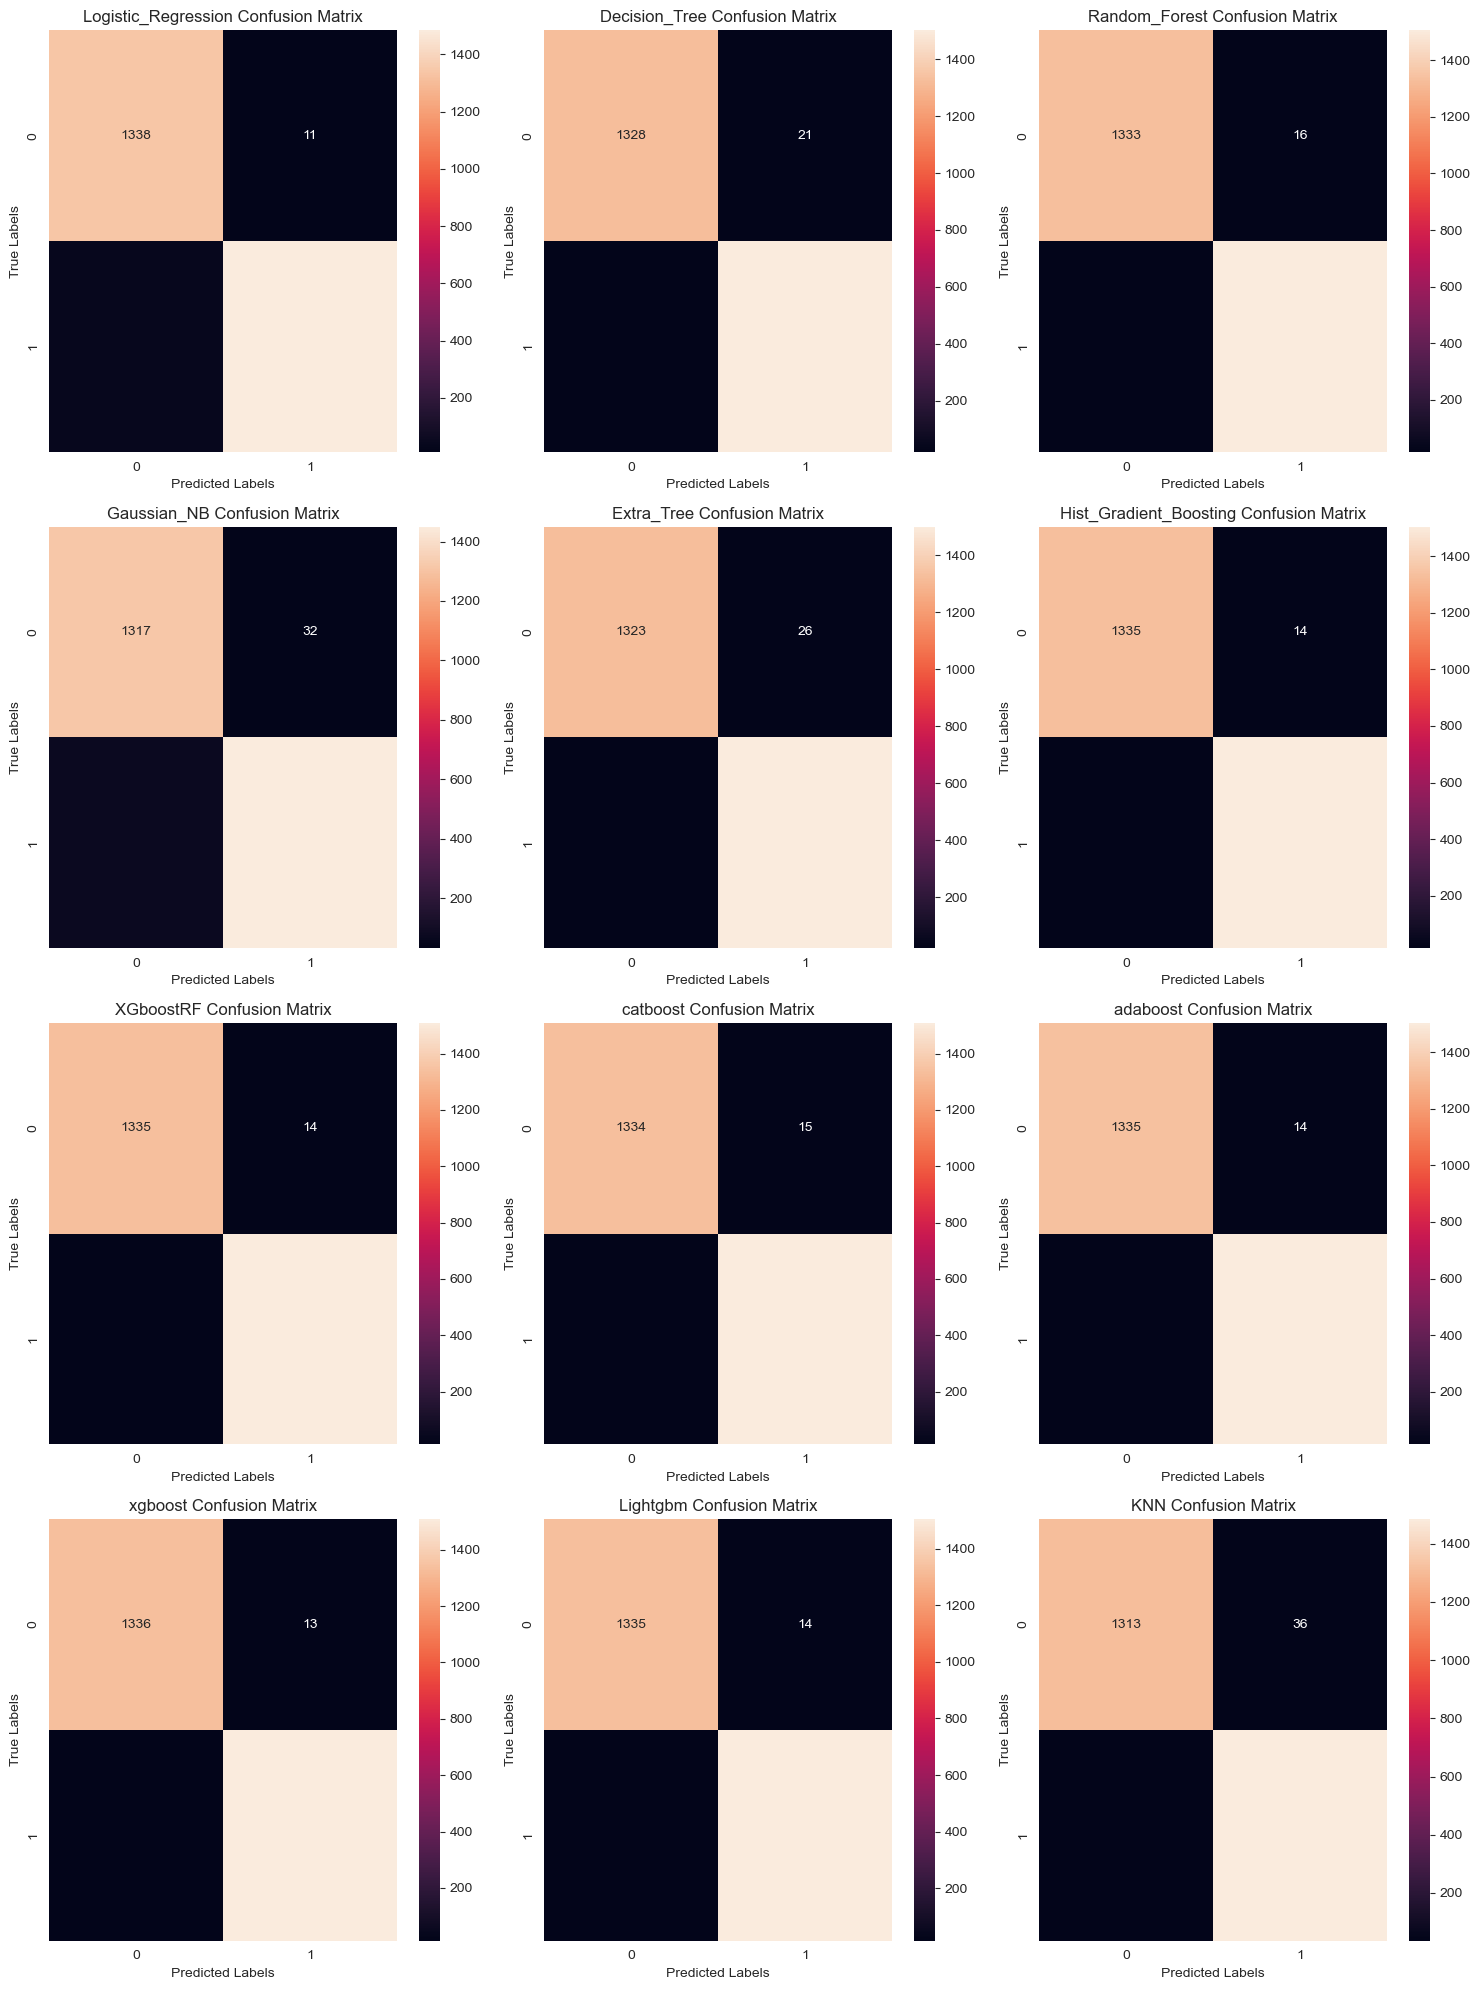

In [65]:
conf_matrix(classifiers, names, X_test, Y_test)

# Cross-validating all the models

In [66]:
def cross_validation(classifiers, names, X_train, Y_train, model_df):
    for name, clf in zip(names, classifiers):
        # Perform cross-validation
        scores = cross_val_score(clf, X_train, Y_train, cv=5)
        
        # Update model_df with cross-validation results
        model_df.at[name, 'CV_Accuracy_Mean'] = np.mean(scores)
        model_df.at[name, 'CV_Accuracy_Std'] = np.std(scores)

In [67]:
cross_validation(classifiers, names, X_train, Y_train, model_df)

Learning rate set to 0.021092
0:	learn: 0.6352259	total: 22.9ms	remaining: 22.9s
1:	learn: 0.5869086	total: 30ms	remaining: 15s
2:	learn: 0.5398625	total: 36.5ms	remaining: 12.1s
3:	learn: 0.4994048	total: 46.2ms	remaining: 11.5s
4:	learn: 0.4602332	total: 54.3ms	remaining: 10.8s
5:	learn: 0.4239800	total: 244ms	remaining: 40.5s
6:	learn: 0.3885340	total: 244ms	remaining: 40.5s
7:	learn: 0.3617892	total: 429ms	remaining: 1m
8:	learn: 0.3363095	total: 429ms	remaining: 1m
9:	learn: 0.3065991	total: 618ms	remaining: 1m 16s
10:	learn: 0.2811945	total: 629ms	remaining: 1m 9s
11:	learn: 0.2579790	total: 639ms	remaining: 1m 3s
12:	learn: 0.2396038	total: 652ms	remaining: 58.5s
13:	learn: 0.2205278	total: 665ms	remaining: 54.6s
14:	learn: 0.2031766	total: 673ms	remaining: 51s
15:	learn: 0.1897691	total: 681ms	remaining: 47.8s
16:	learn: 0.1830493	total: 688ms	remaining: 45.1s
17:	learn: 0.1742726	total: 700ms	remaining: 43s
18:	learn: 0.1663346	total: 715ms	remaining: 41.3s
19:	learn: 0.159877

In [68]:
model_df.head(12)

,Training Accuracy,Testing Accuracy,CV_Accuracy_Mean,CV_Accuracy_Std
xgboost,1.000000,0.990941,0.990588,0.001303
Hist_Gradient_Boosting,1.000000,0.989547,0.991635,0.001522
Lightgbm,1.000000,0.989547,0.992082,0.001214
Random_Forest,1.000000,0.989199,0.988049,0.001419
Decision_Tree,1.000000,0.986063,0.984763,0.003796
Extra_Tree,1.000000,0.983624,0.973709,0.008989
catboost,0.999851,0.990592,0.993427,0.001447
XGboostRF,0.997610,0.990941,0.989244,0.001743
adaboost,0.996863,0.988850,0.991186,0.002186
Logistic_Regression,0.987003,0.983275,0.985957,0.001917


In [83]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, MaxPooling1D

In [101]:
X_train.shape

(6694, 41)

In [95]:
# Define the model architecture
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(41, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

2024-04-08 06:07:50.726293: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-08 06:07:50.730775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-08 06:07:50.733935: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [100]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 39, 32)            128       
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 19, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_15 (Conv1D)          (None, 17, 64)            6208      
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 8, 64)            0         
 g1D)                                                            
                                                                 
 lstm_10 (LSTM)              (None, 8, 64)             33024     
                                                                 
 lstm_11 (LSTM)              (None, 64)               

In [97]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [102]:
# Train the model
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/10
210/210 [==============================] - 16s 74ms/step - loss: 0.0275 - accuracy: 0.9900 - val_loss: 0.0424 - val_accuracy: 0.9857
Epoch 2/10
210/210 [==============================] - 9s 43ms/step - loss: 0.0279 - accuracy: 0.9901 - val_loss: 0.0326 - val_accuracy: 0.9878
Epoch 3/10
210/210 [==============================] - 12s 56ms/step - loss: 0.0261 - accuracy: 0.9907 - val_loss: 0.0435 - val_accuracy: 0.9843
Epoch 4/10
210/210 [==============================] - 8s 39ms/step - loss: 0.0259 - accuracy: 0.9909 - val_loss: 0.0391 - val_accuracy: 0.9857
Epoch 5/10
210/210 [==============================] - 9s 42ms/step - loss: 0.0250 - accuracy: 0.9912 - val_loss: 0.0488 - val_accuracy: 0.9847
Epoch 6/10
210/210 [==============================] - 8s 36ms/step - loss: 0.0233 - accuracy: 0.9915 - val_loss: 0.0313 - val_accuracy: 0.9892
Epoch 7/10
210/210 [==============================] - 10s 45ms/step - loss: 0.0246 - accuracy: 0.9906 - val_loss: 0.0326 - val_accuracy: 0.9

In [103]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

90/90 [==============================] - 1s 13ms/step - loss: 0.0318 - accuracy: 0.9885
Test Accuracy: 0.9885017275810242


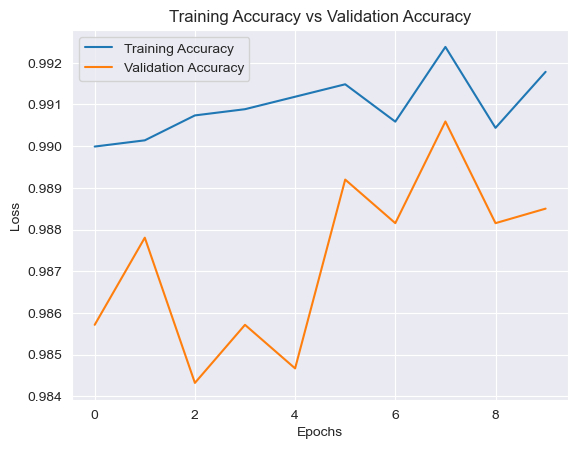

In [108]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

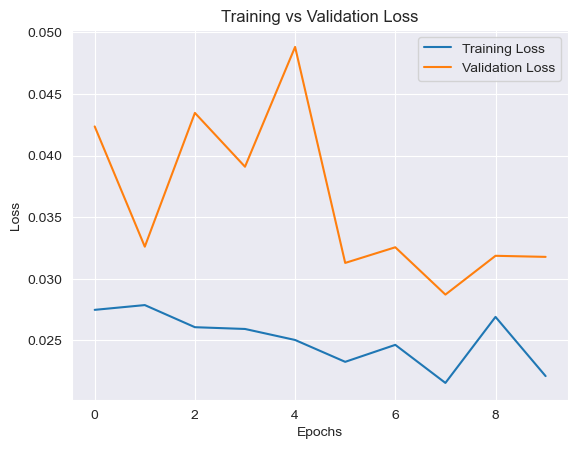

In [109]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

90/90 [==============================] - 1s 16ms/step


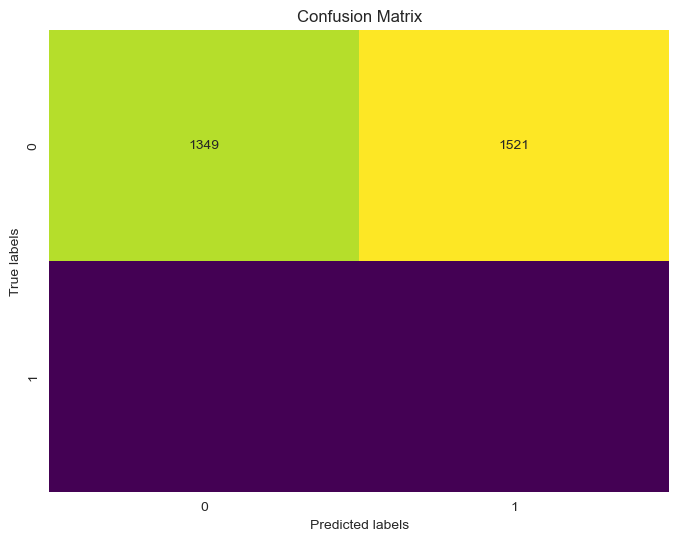

In [118]:
y_pred_prob = model.predict(X_test)
Y_pred = np.argmax(y_pred_prob, axis=1)

conf_matrix = confusion_matrix(Y_pred, Y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()